In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [13]:
df = pd.read_csv('../data/MTA_Subway_Terminal_On-Time_Performance__2015-2019.csv')
df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2015-01,1,A DIVISION,1,6874,9017,0.762338
1,2015-01,2,A DIVISION,1,2920,6175,0.472874
2,2015-01,3,A DIVISION,1,4004,5834,0.686322
3,2015-01,4,A DIVISION,1,3692,7623,0.484324
4,2015-01,5,A DIVISION,1,3203,6491,0.493452
...,...,...,...,...,...,...,...
1660,2019-12,S Fkln,B DIVISION,2,2072,2092,0.990440
1661,2019-12,S Rock,B DIVISION,1,3379,3528,0.957766
1662,2019-12,S Rock,B DIVISION,2,1497,1544,0.969560
1663,2019-12,Systemwide,Systemwide,1,137946,172004,0.801993


In [14]:
df['date'] = pd.to_datetime(df['month'], format='%Y-%m')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df['season'] = df['date'].dt.quarter

df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year,season
0,1,1,A DIVISION,1,6874,9017,0.762338,2015-01-01,2015,1
1,1,2,A DIVISION,1,2920,6175,0.472874,2015-01-01,2015,1
2,1,3,A DIVISION,1,4004,5834,0.686322,2015-01-01,2015,1
3,1,4,A DIVISION,1,3692,7623,0.484324,2015-01-01,2015,1
4,1,5,A DIVISION,1,3203,6491,0.493452,2015-01-01,2015,1
...,...,...,...,...,...,...,...,...,...,...
1660,12,S Fkln,B DIVISION,2,2072,2092,0.990440,2019-12-01,2019,4
1661,12,S Rock,B DIVISION,1,3379,3528,0.957766,2019-12-01,2019,4
1662,12,S Rock,B DIVISION,2,1497,1544,0.969560,2019-12-01,2019,4
1663,12,Systemwide,Systemwide,1,137946,172004,0.801993,2019-12-01,2019,4


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

month                           0
line                            0
division                        0
day_type                        0
num_on_time_trips               0
num_sched_trips                 0
terminal_on_time_performance    0
date                            0
year                            0
dtype: int64

In [15]:
# filter for line 6
df_6 = df[df['line'] == '6']
df_6

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year,season
5,1,6,A DIVISION,1,5967,11509,0.518464,2015-01-01,2015,1
29,2,6,A DIVISION,1,4255,10630,0.400282,2015-02-01,2015,1
53,3,6,A DIVISION,1,4931,12246,0.402662,2015-03-01,2015,1
77,4,6,A DIVISION,1,5109,12252,0.416993,2015-04-01,2015,2
101,5,6,A DIVISION,1,5603,11210,0.499822,2015-05-01,2015,2
...,...,...,...,...,...,...,...,...,...,...
1535,10,6,A DIVISION,2,2392,2680,0.892537,2019-10-01,2019,4
1581,11,6,A DIVISION,1,8596,11088,0.775253,2019-11-01,2019,4
1582,11,6,A DIVISION,2,2459,2826,0.870134,2019-11-01,2019,4
1628,12,6,A DIVISION,1,8998,11696,0.769323,2019-12-01,2019,4


In [16]:
# calculate average yearly on-time performance for line 3
df_6_avg_year = df_6.groupby(['year'])['terminal_on_time_performance'].mean()
df_6_avg_year

year
2015    0.460791
2016    0.482738
2017    0.515791
2018    0.608323
2019    0.804568
Name: terminal_on_time_performance, dtype: float64

In [17]:
# calculate average monthly on-time performance for line 6
df_6_avg = df_6.groupby(['year', 'month'])['terminal_on_time_performance'].mean().reset_index()
df_6_avg.head()

,year,month,terminal_on_time_performance
0,2015,1,0.518464
1,2015,2,0.400282
2,2015,3,0.402662
3,2015,4,0.416993
4,2015,5,0.499822


In [18]:
df_6_avg['yearly_avg'] = df_6_avg.groupby(['year'])['terminal_on_time_performance'].transform('mean')
df_6_avg.head()

,year,month,terminal_on_time_performance,yearly_avg
0,2015,1,0.518464,0.460791
1,2015,2,0.400282,0.460791
2,2015,3,0.402662,0.460791
3,2015,4,0.416993,0.460791
4,2015,5,0.499822,0.460791


In [19]:
# get months with below average on-time performance
below_average = df_6_avg['terminal_on_time_performance'] < df_6_avg['yearly_avg']
df_6_avg[below_average].head()

,year,month,terminal_on_time_performance,yearly_avg
1,2015,2,0.400282,0.460791
2,2015,3,0.402662,0.460791
3,2015,4,0.416993,0.460791
8,2015,9,0.450149,0.460791
9,2015,10,0.376960,0.460791


In [20]:
above_average = df_6_avg['terminal_on_time_performance'] > df_6_avg['yearly_avg']
df_6_avg[above_average].head()

,year,month,terminal_on_time_performance,yearly_avg
0,2015,1,0.518464,0.460791
4,2015,5,0.499822,0.460791
5,2015,6,0.474181,0.460791
6,2015,7,0.499510,0.460791
7,2015,8,0.560387,0.460791


In [21]:
# examine day type and on-time performance
df_6_day_type = df_6.groupby(['day_type'])['terminal_on_time_performance'].mean().reset_index()
df_6_day_type

,day_type,terminal_on_time_performance
0,1,0.568653
1,2,0.843166


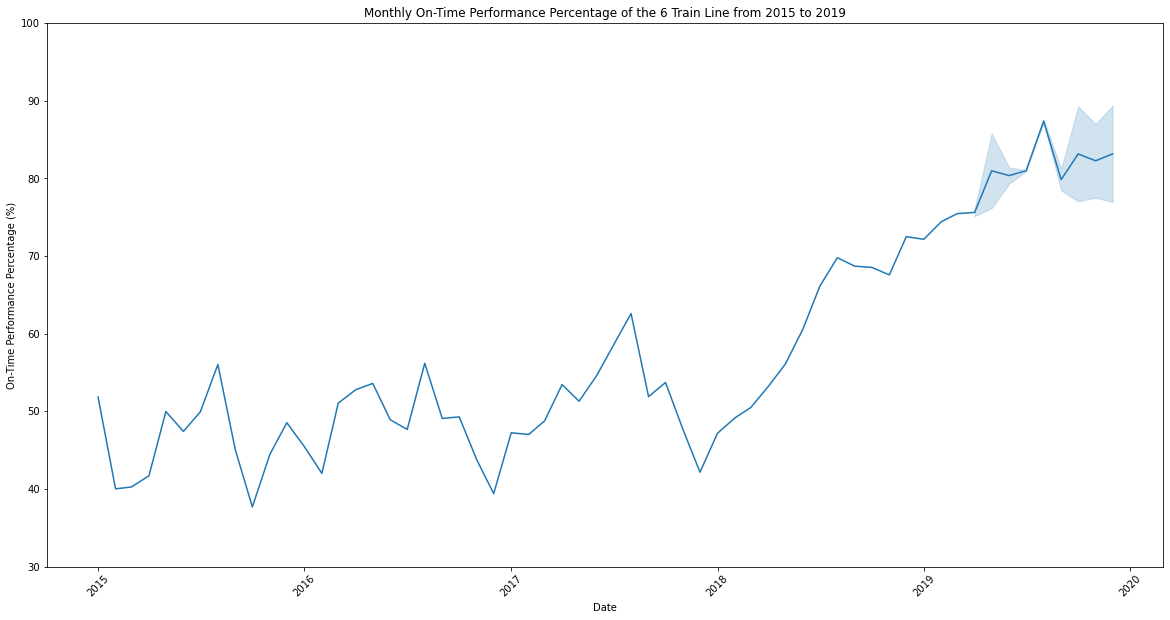

In [23]:
# Create a line chart showing the monthly on-time performance percentage of the 3 train line from 2015 to 2019.
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='date', y=df_6['terminal_on_time_performance']*100, data=df_6)

plt.title('Monthly On-Time Performance Percentage of the 6 Train Line from 2015 to 2019')
plt.xlabel('Date')
plt.ylabel('On-Time Performance Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(30, 100)
plt.show()